In [1]:
# Garbage Collector
import gc 

import pandas as pd
import numpy as np
import os

# Time Modules
import calendar
import time
import datetime
from datetime import datetime, timedelta

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(18, 12)})
%matplotlib inline

# Statistics 
from scipy.stats import norm
from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
"""
Additional Information

This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column. For further information or to pass on comments, please contact Athanasios Tsanas (tsanasthanasis@gmail.com) or Max Little (littlem@physics.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Athanasios Tsanas, Max A. Little, Patrick E. McSharry, Lorraine O. Ramig (2009),
'Accurate telemonitoring of Parkinson’s disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering (to appear).

Further details about the biomedical voice measures can be found in:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2009), 
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
IEEE Transactions on Biomedical Engineering, 56(4):1015-1022
"""

"\nAdditional Information\n\nThis dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.\n\nColumns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.\n\nThe data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column. For further information or to pass on comments, please 

In [3]:
"""
Citation:
Tsanas, A. & Little, M. (2009). Parkinsons Telemonitoring [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5ZS3N.
"""

'\nCitation:\nTsanas, A. & Little, M. (2009). Parkinsons Telemonitoring [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5ZS3N.\n'

In [4]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons_telemonitoring = fetch_ucirepo(id=189) 
  
# data (as pandas dataframes) 
X = parkinsons_telemonitoring.data.features 
y = parkinsons_telemonitoring.data.targets 
  
# # metadata 
# print(parkinsons_telemonitoring.metadata) 
  
# # variable information 
# print(parkinsons_telemonitoring.variables) 

## I. **DataFrame Overview.**

In [5]:
"""Color palette based on number of columns, useful to visualize data."""
color_features = list(sns.color_palette("hls", len(list(X.columns))))

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   test_time      5875 non-null   float64
 2   Jitter(%)      5875 non-null   float64
 3   Jitter(Abs)    5875 non-null   float64
 4   Jitter:RAP     5875 non-null   float64
 5   Jitter:PPQ5    5875 non-null   float64
 6   Jitter:DDP     5875 non-null   float64
 7   Shimmer        5875 non-null   float64
 8   Shimmer(dB)    5875 non-null   float64
 9   Shimmer:APQ3   5875 non-null   float64
 10  Shimmer:APQ5   5875 non-null   float64
 11  Shimmer:APQ11  5875 non-null   float64
 12  Shimmer:DDA    5875 non-null   float64
 13  NHR            5875 non-null   float64
 14  HNR            5875 non-null   float64
 15  RPDE           5875 non-null   float64
 16  DFA            5875 non-null   float64
 17  PPE            5875 non-null   float64
 18  sex     

In [7]:
X.head()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0


In [8]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000034,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560
Jitter:DDP,5875.0,0.008962,0.009371,0.000980,0.004730,0.006750,0.009870,0.172630
Shimmer,5875.0,0.034035,0.025835,0.003060,0.019120,0.027510,0.039750,0.268630
Shimmer(dB),5875.0,0.310960,0.230254,0.026000,0.175000,0.253000,0.365000,2.107000
Shimmer:APQ3,5875.0,0.017156,0.013237,0.001610,0.009280,0.013700,0.020575,0.162670


In [9]:
print(f'Columns: {X.shape[1]}')
print(f'Rows: {X.shape[0]}')

Columns: 19
Rows: 5875


## I. **Target.**

In [10]:
target = ['motor_UPDRS','total_UPDRS']
# X['motor_UPDRS'] = y['motor_UPDRS']
# X['total_UPDRS'] = y['total_UPDRS']

In [11]:
y.describe().T

,count,mean,std,min,25%,50%,75%,max
motor_UPDRS,5875.0,21.296229,8.129282,5.0377,15.000,20.871,27.5965,39.511
total_UPDRS,5875.0,29.018942,10.700283,7.0000,21.371,27.576,36.3990,54.992


## I. **How do Shimmer(dB)' and 'Jitter(%)' values behave on time.**

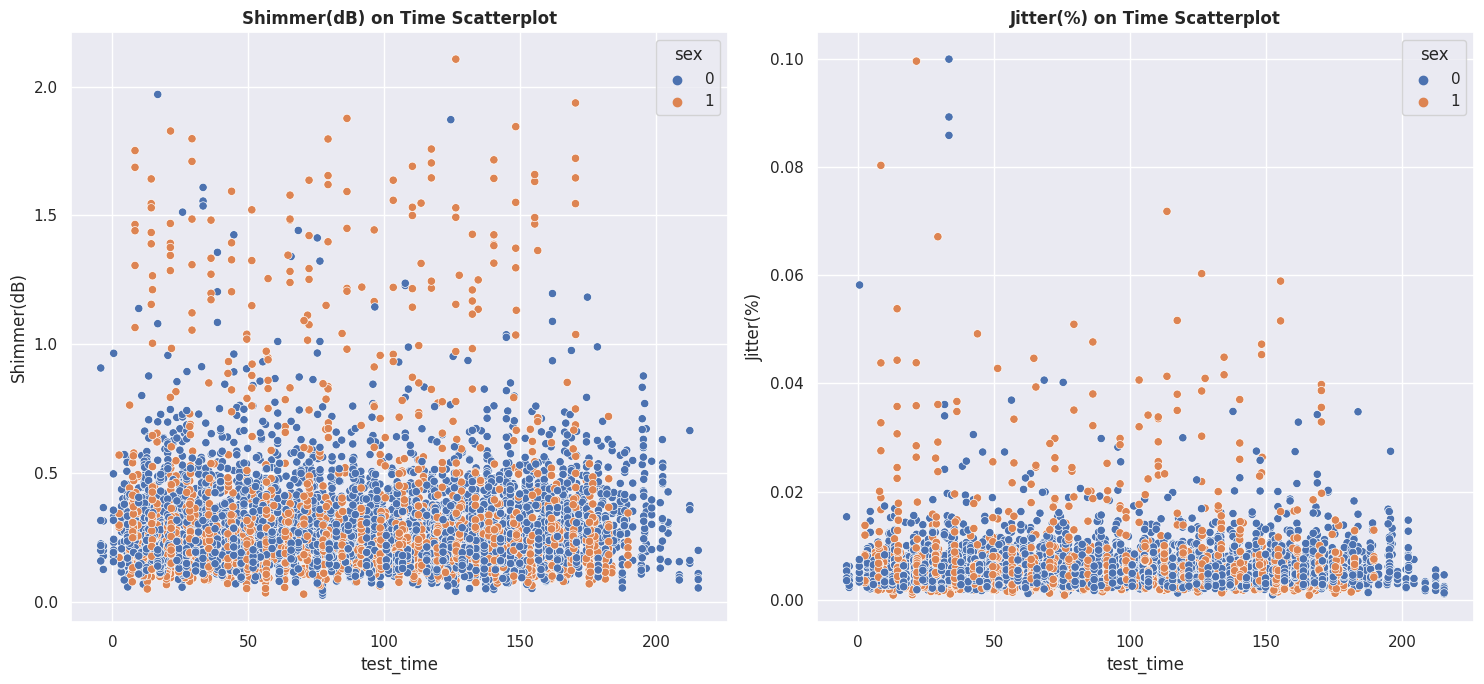

In [12]:
#Jitter(%), Shimmer(dB)
# 'Shimmer(dB)', 'Jitter(%)'
# 'motor_UPDRS','total_UPDRS'

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.scatterplot(data=X, y="Shimmer(dB)", x="test_time", hue='sex', ax=axes[0])
axes[0].set_title('Shimmer(dB) on Time Scatterplot', fontweight='bold', fontsize=12)

sns.scatterplot(data=X, y='Jitter(%)', x="test_time",hue='sex', ax=axes[1])
axes[1].set_title('Jitter(%) on Time Scatterplot', fontweight='bold', fontsize=12)


# Show plot
plt.tight_layout()
plt.show()

## I. **Can we detect trends in voice measurements over time for individual patients?**

In [13]:
parameters = ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA']

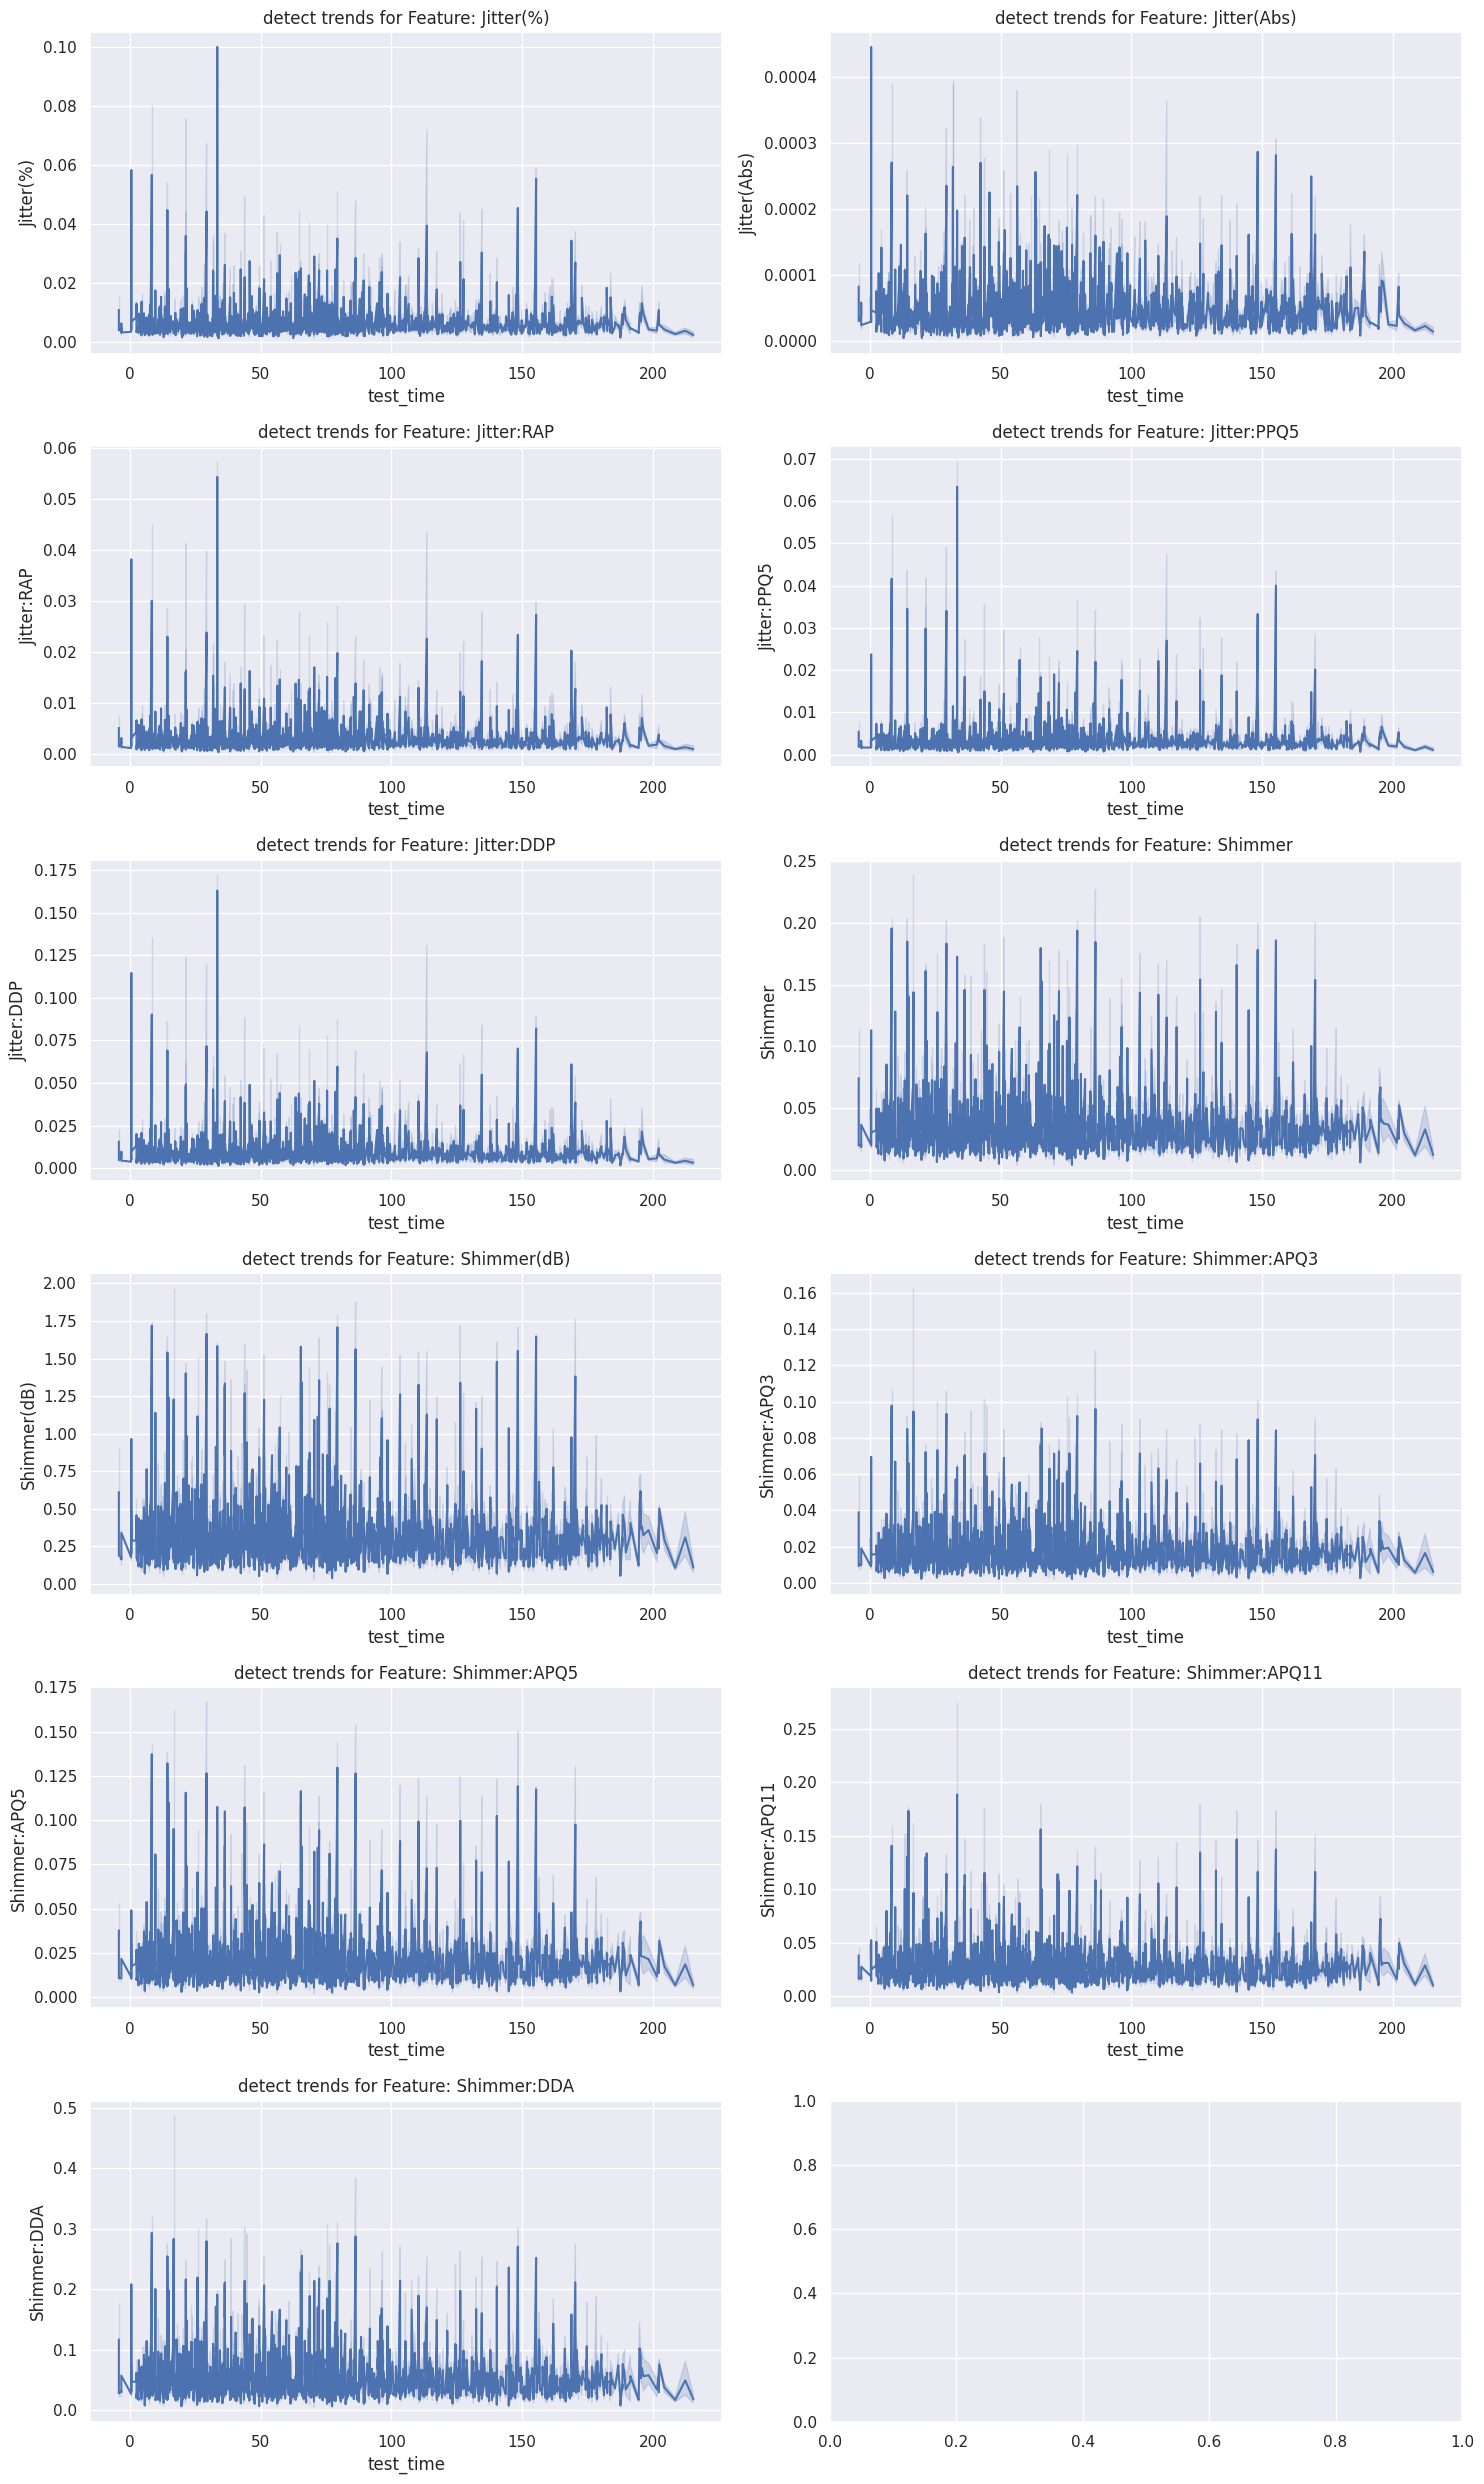

In [14]:
columns = (len(parameters) + 1) // 2
rows = 2

fig, axs = plt.subplots(columns, 2, figsize=(15, 25))
axs = axs.flatten()

for i, col in enumerate(parameters):
    if col != 'test_time':
        sns.lineplot(data=X, x=X['test_time'], y=col, ax=axs[i], palette=sns.color_palette("Spectral", as_cmap=True), markers=True, dashes=False)

        ax=axs[i].set_title(f'detect trends for Feature: {col}')
    else:
        break
gc.collect()
plt.tight_layout()
plt.show()

## I. **KDE plot for all Float Columns based on Sex.**

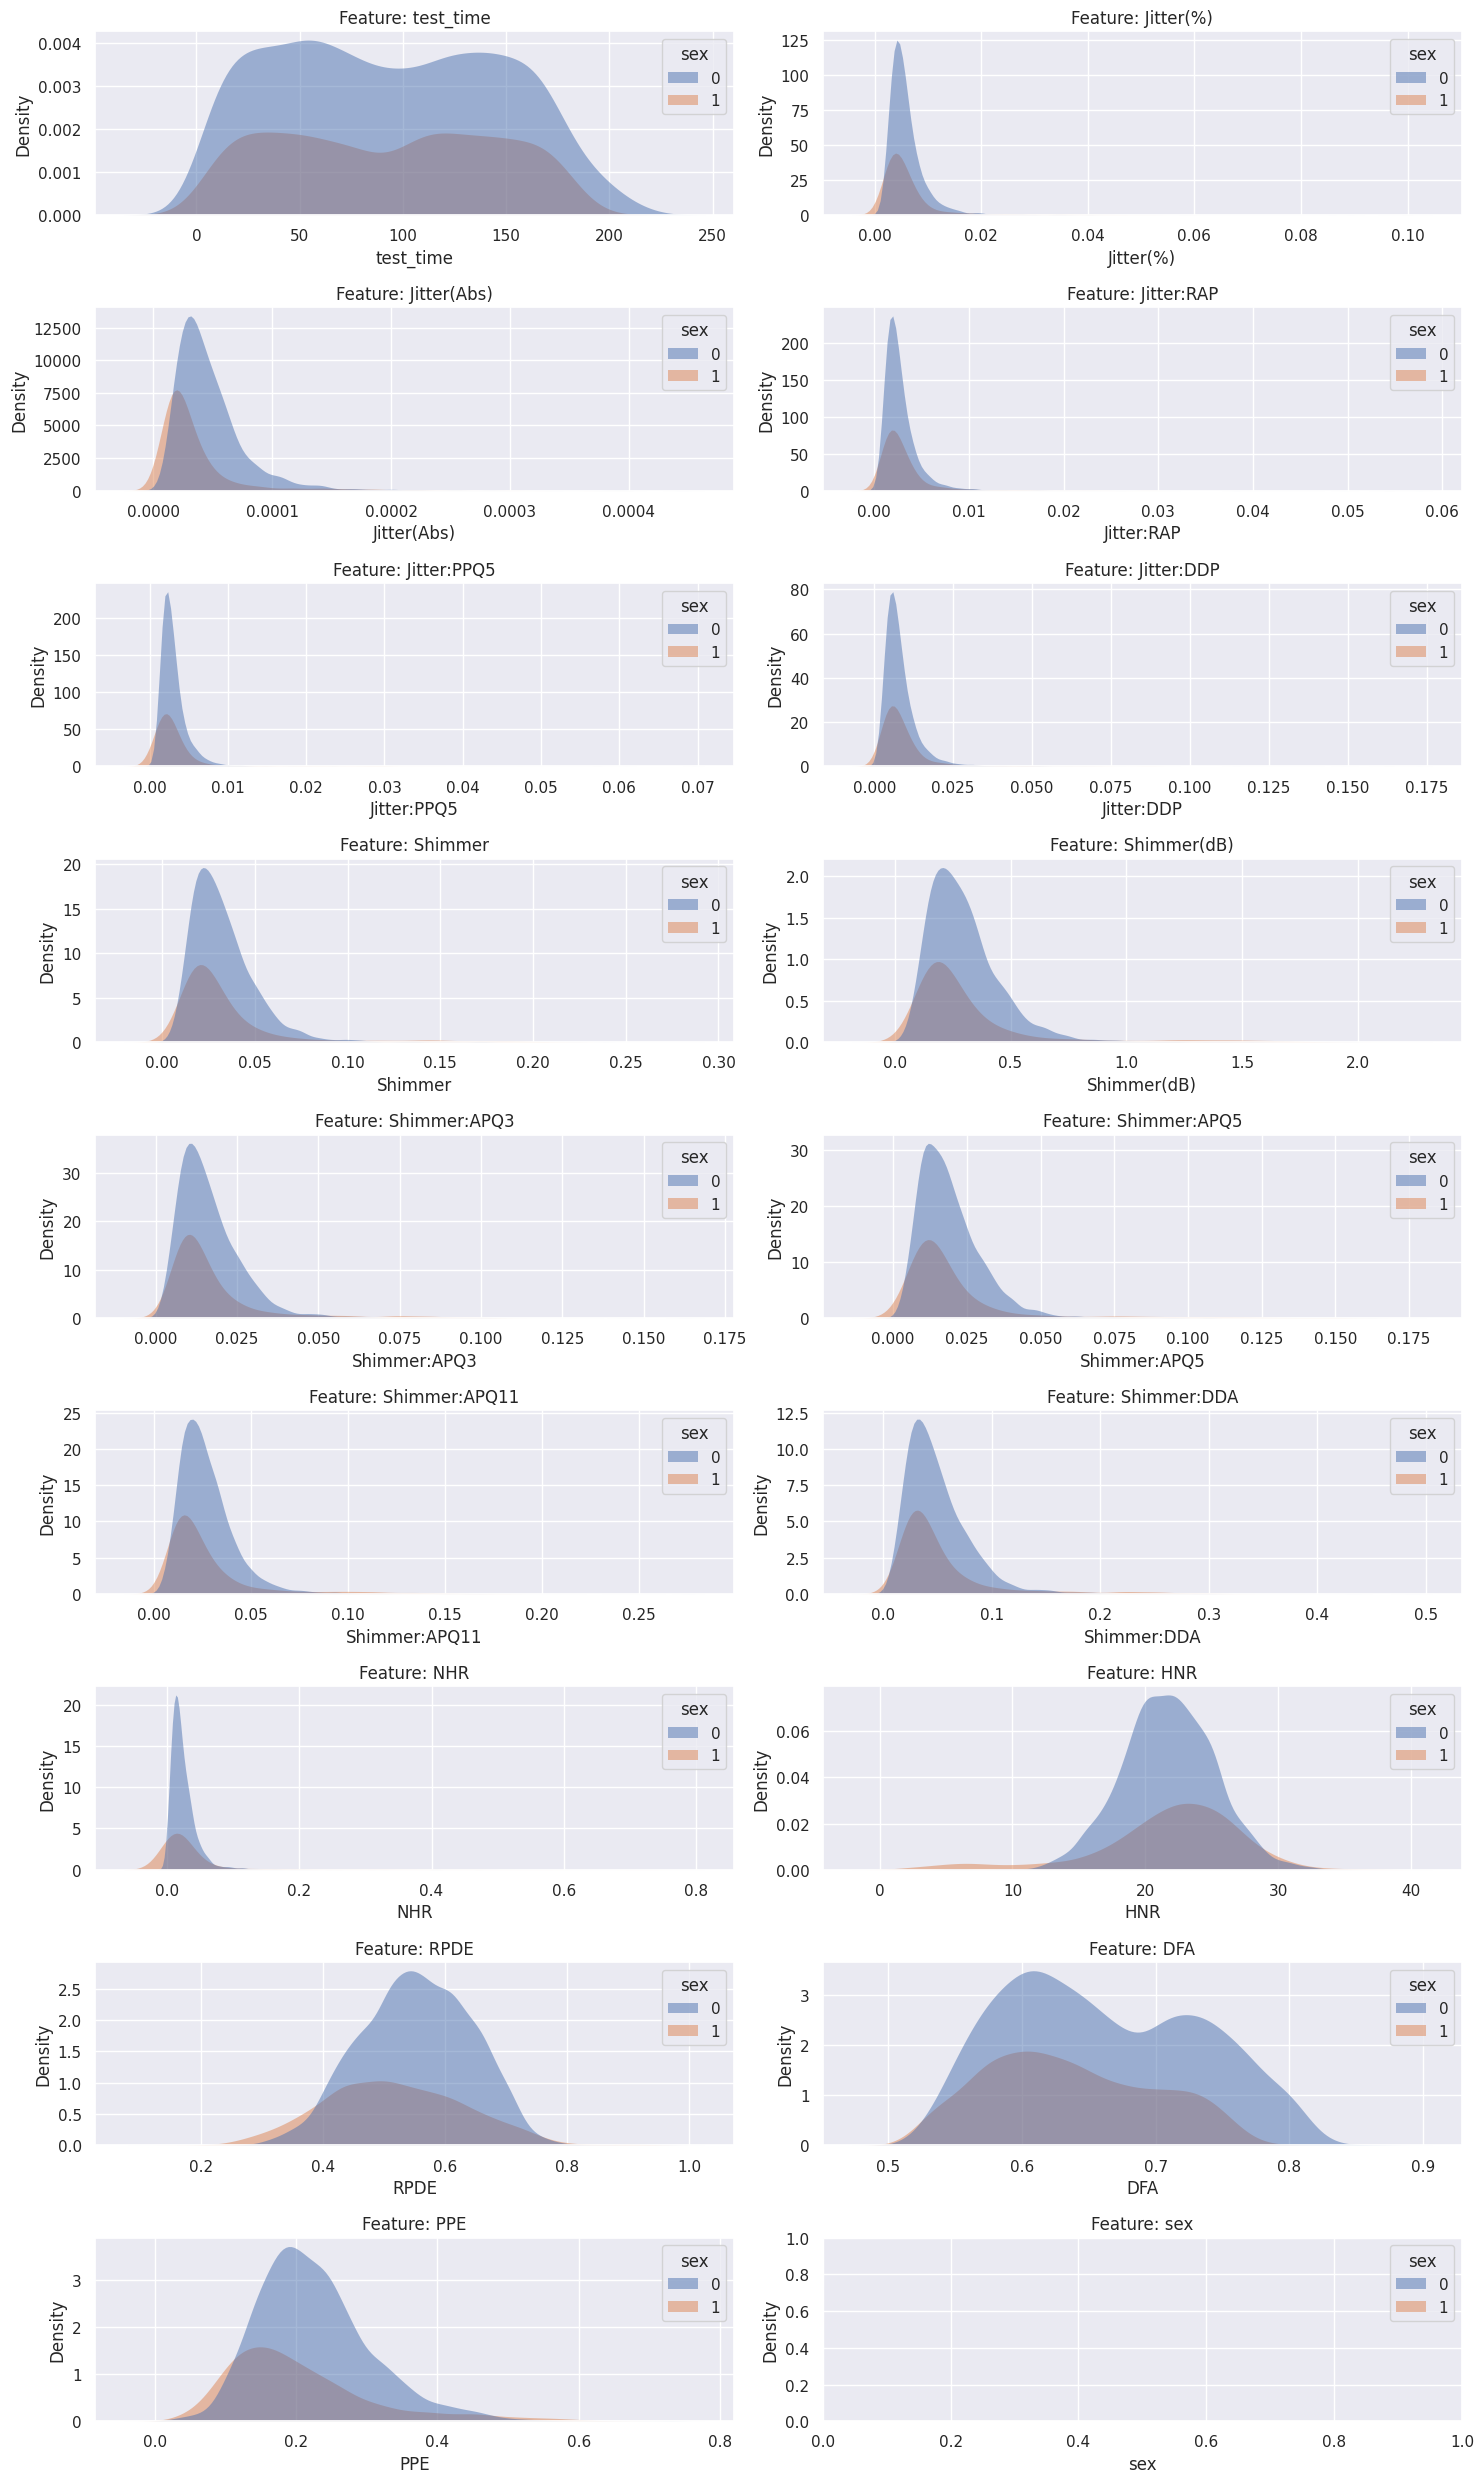

In [15]:
float_columns = list(X.select_dtypes(include='float64').columns) + ['sex']

# Setting numbers of rows and columns.
columns = (len(float_columns) + 1) // 2
rows = 2

fig, axs = plt.subplots(columns, 2, figsize=(15, 25))
axs = axs.flatten()

# Plot KDE plots for each dataset
for i, col in enumerate(float_columns):
    sns.kdeplot(data=X, 
                x=col, 
                fill=True, 
                common_norm=True, 
                hue='sex', 
                alpha=.5, 
                linewidth=0, 
                ax=axs[i])
    
    ax=axs[i].set_title(f'Feature: {col}')
gc.collect()
plt.tight_layout()
plt.show()

In [16]:
"""
A right-skewed (or positively skewed) distribution has a tail that extends more prominently to the right than to the left. Since the skewness is positive, it implies that the distribution’s values are generally positive, with most data points concentrated to the left of the mean. As a result, the most extreme values appear on the right side. Additionally, we can observe some multimodal distributions, which are probability distributions with more than one mode (i.e., multiple local peaks). These appear as distinct peaks (local maxima) in the probability density function.
"""

'\nA right-skewed (or positively skewed) distribution has a tail that extends more prominently to the right than to the left. Since the skewness is positive, it implies that the distribution’s values are generally positive, with most data points concentrated to the left of the mean. As a result, the most extreme values appear on the right side. Additionally, we can observe some multimodal distributions, which are probability distributions with more than one mode (i.e., multiple local peaks). These appear as distinct peaks (local maxima) in the probability density function.\n'

## I. **Heatmap on Target.**

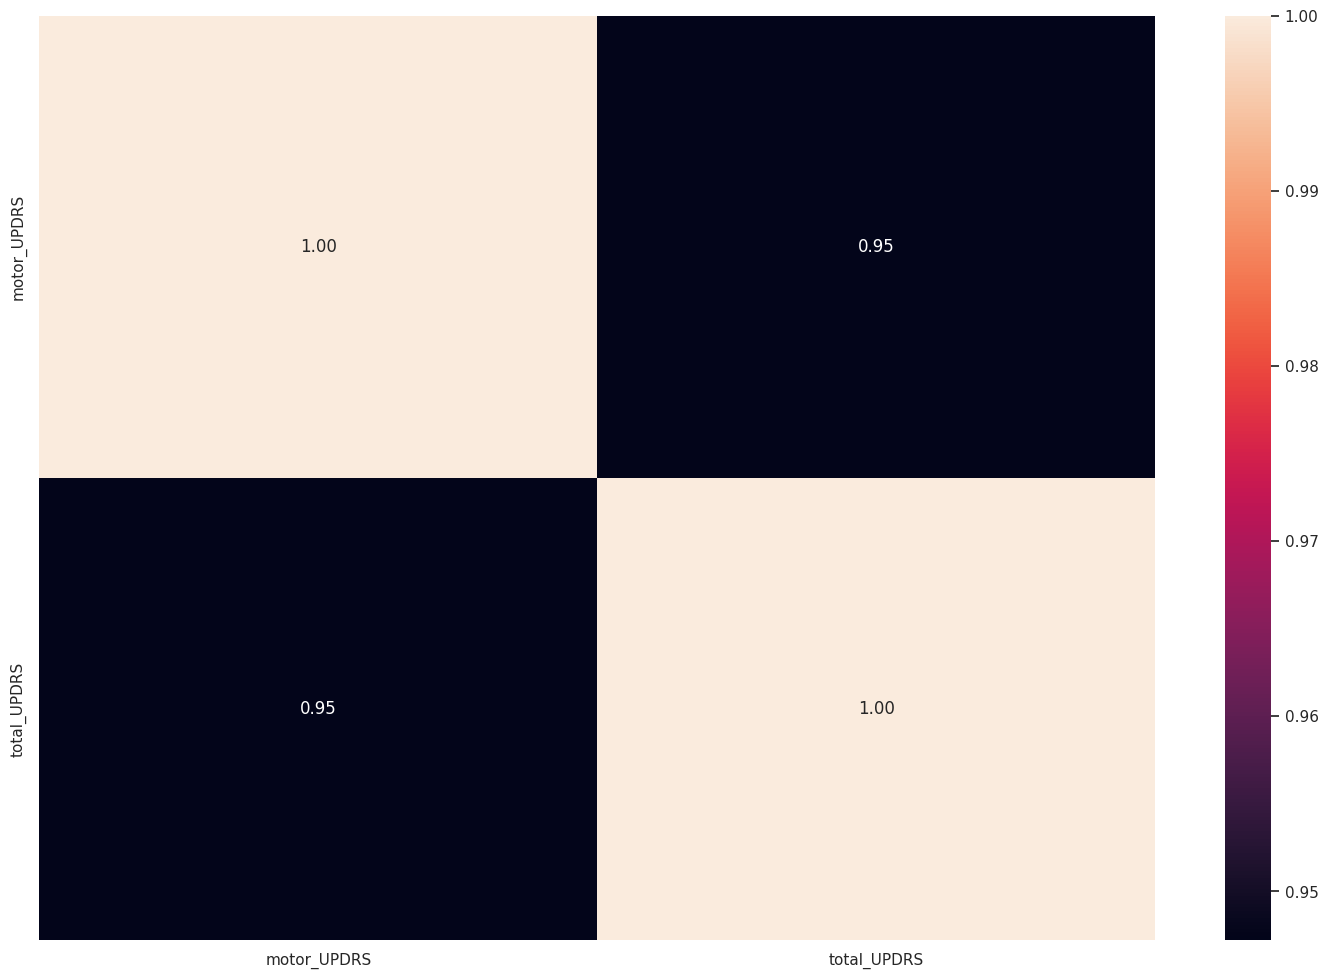

In [17]:
corr = y.corr()

fig, ax = plt.subplots(figsize=(18, 12))
ax = sns.heatmap(corr, mask=None, fmt='.2f', annot=True, ax=ax);

In [18]:
y.head(5)

,motor_UPDRS,total_UPDRS
0,28.199,34.398
1,28.447,34.894
2,28.695,35.389
3,28.905,35.810
4,29.187,36.375


## I. **total_UPDRS distribution analysis**.

In [19]:
mu, sigma = stats.norm.fit(y["total_UPDRS"])
print(f'Mu {mu:.2f}.')
print(f'Sigma {sigma:.2f}.')

Mu 29.02.
Sigma 10.70.


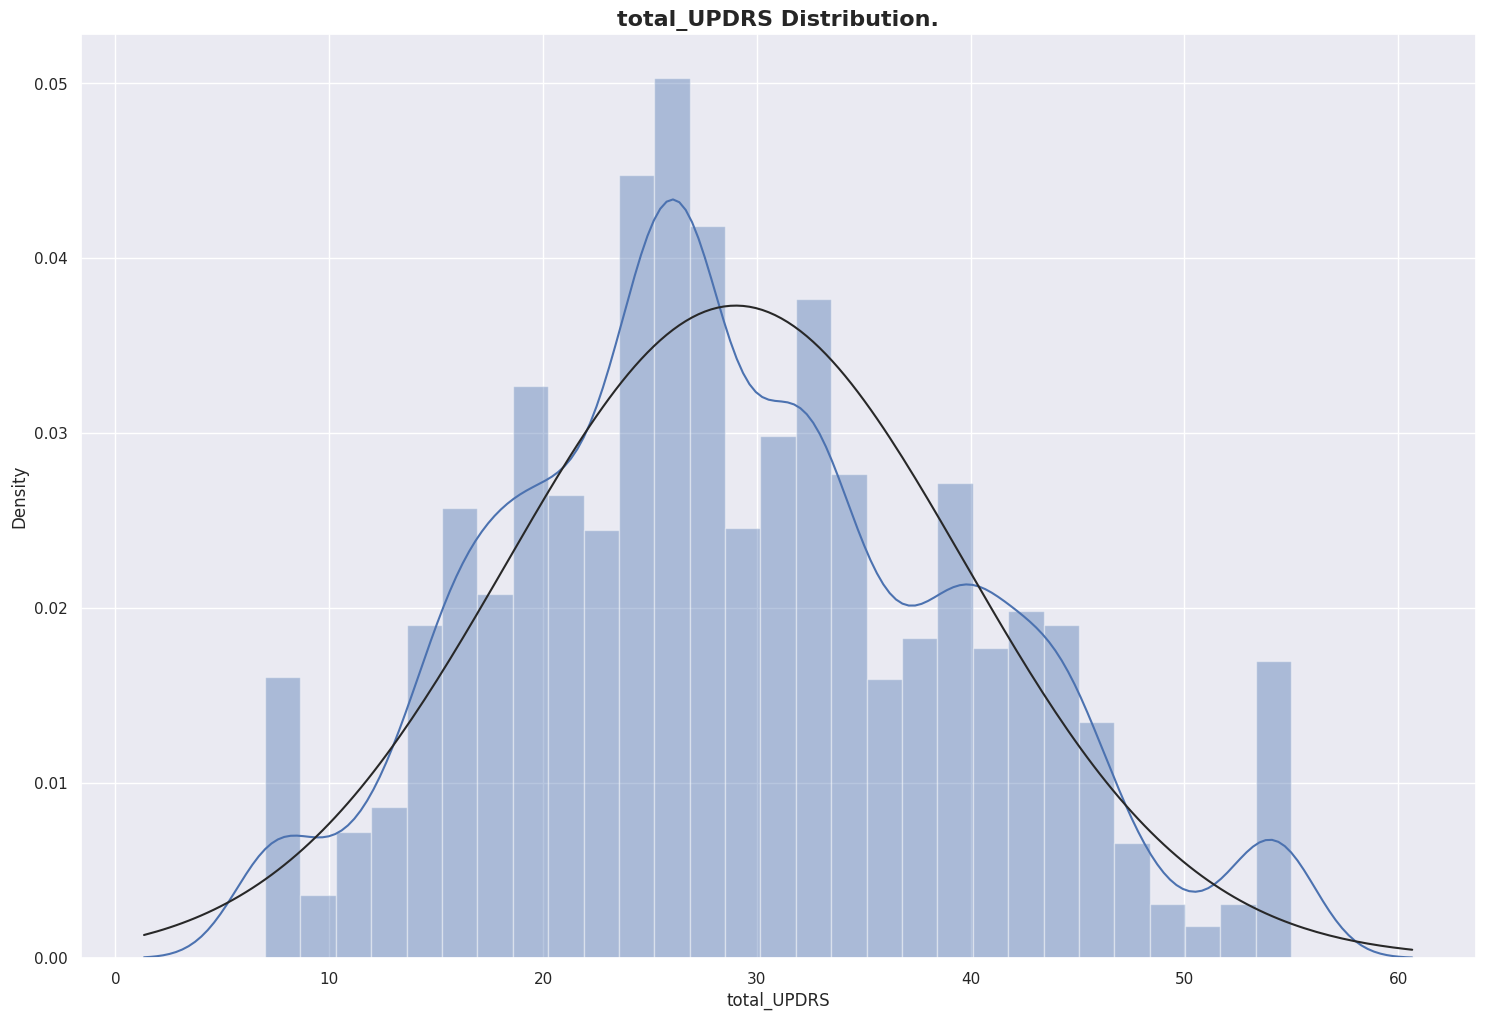

In [20]:
fig, ax = plt.subplots(figsize=(18, 12))
ax = sns.distplot(y["total_UPDRS"], kde=True, fit=norm).set_title('total_UPDRS Distribution.', fontsize=16, fontweight='bold')

## I. **motor_UPDRS distribution analysis**.

In [21]:
mu, sigma = stats.norm.fit(y["motor_UPDRS"])
print(f'Mu {mu:.2f}.')
print(f'Sigma {sigma:.2f}.')

Mu 21.30.
Sigma 8.13.


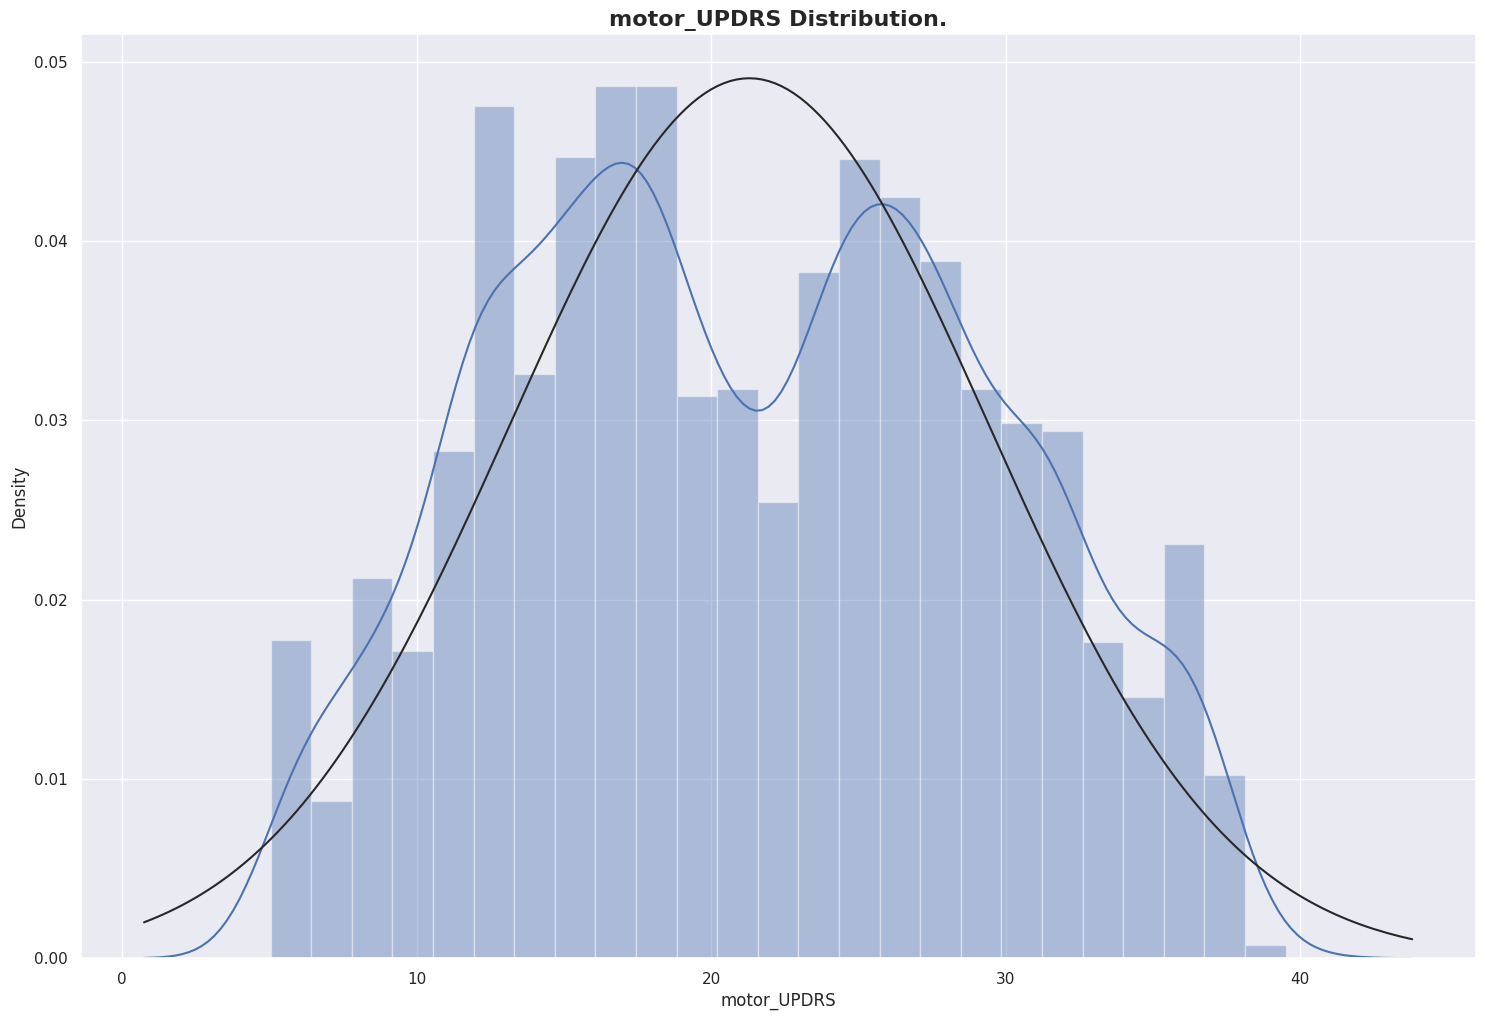

In [22]:
fig, ax = plt.subplots(figsize=(18, 12))
ax = sns.distplot(y["motor_UPDRS"], kde=True, fit=norm).set_title('motor_UPDRS Distribution.', fontsize=16, fontweight='bold')

## I. **Histogram on Age based on Sex.**

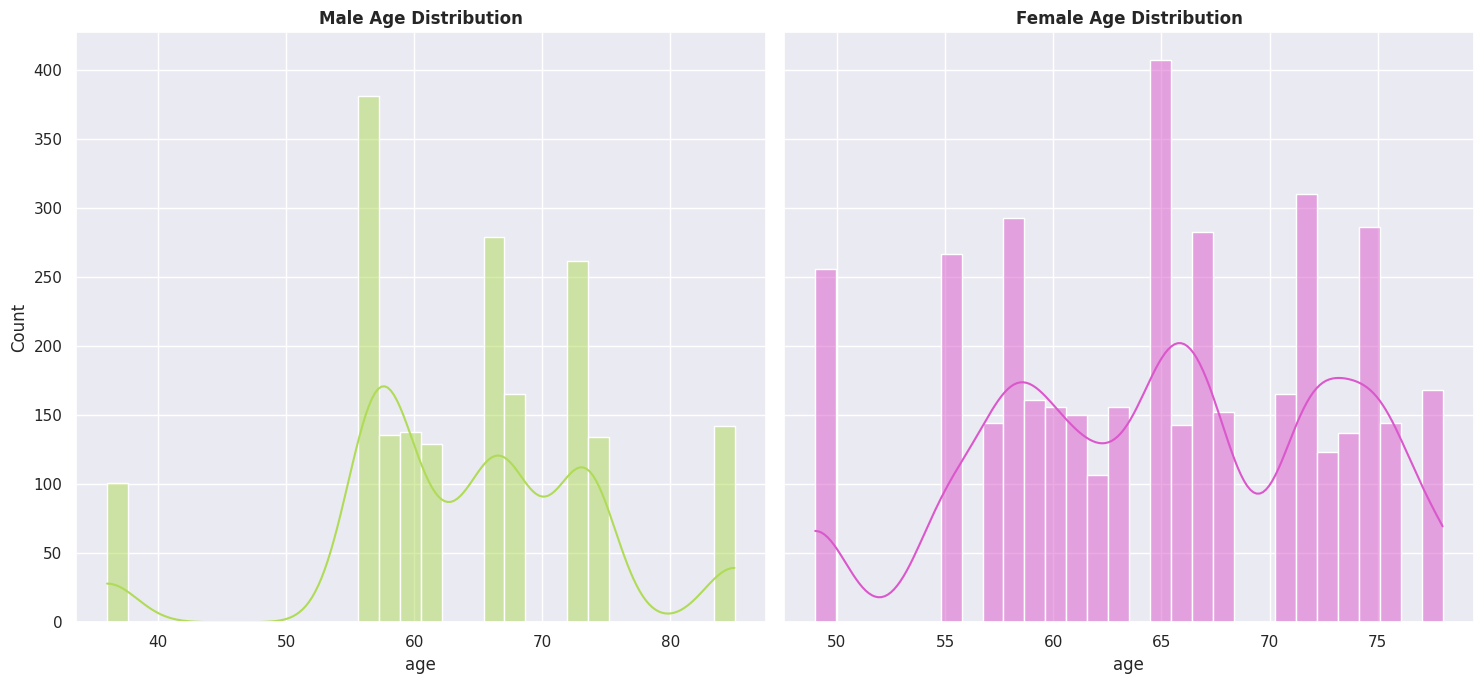

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)


# Plot histograms separately for each sex
sns.histplot(data=X[X['sex'] == 1], x='age', kde=True, bins=30, color=color_features[4], alpha=0.5, label='Male', ax=axes[0])
axes[0].set_title('Male Age Distribution', fontweight='bold', fontsize=12)

sns.histplot(data=X[X['sex'] == 0], x='age', kde=True, bins=30, color=color_features[16], alpha=0.5, label='Female', ax=axes[1])
axes[1].set_title('Female Age Distribution', fontweight='bold', fontsize=12)


# Show plot
plt.tight_layout()
plt.show()

## I. **Can PCA (Principal Component Analysis) reduce the dimensionality while retaining key variance?**

In [24]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [25]:
to_transform = ['age', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE']

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X[to_transform], y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(feature_range=(-3, +3)), list(X_train.columns)),
        ('pca', PCA(n_components=3), list(X_train.columns))
    ]
)

X_transformed = preprocessor.fit_transform(X_train)

multi_output_regressor = MultiOutputRegressor(xgb.XGBRegressor())

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', multi_output_regressor)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)

print(f'RMSE: {np.sqrt(mean_squared_error(y_valid, y_pred))}')

RMSE: 3.4367260963365367


In [27]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-7.331138,0.583849,-0.104369,0.114213,-0.099458,0.000447,-0.009652,0.000461,-0.002337,-0.002030,0.001381,0.000343,-0.000378,-0.000013,-0.000001,-0.000003
1,-6.223275,-1.029535,-0.060662,-0.076227,0.136635,0.000312,0.012032,0.002227,0.002008,-0.002817,0.001166,-0.000038,-0.000163,0.000003,-0.000003,0.000002
2,-6.397331,1.629544,-0.026362,-0.093792,0.063863,0.009676,-0.018047,-0.002336,-0.001152,-0.002036,0.002040,-0.000110,0.000174,0.000005,0.000004,0.000001
3,8.852128,-1.693507,0.032693,-0.150987,-0.032838,0.040578,0.000872,0.002429,-0.002306,0.001171,-0.001118,0.000057,-0.000285,-0.000006,-0.000004,-0.000001
4,-10.550120,3.835367,-0.155432,0.048486,0.170071,-0.040608,-0.010131,-0.004627,0.006644,-0.000010,0.002917,0.000154,-0.000872,-0.000018,0.000001,-0.000004


In [28]:
# A component's loadings tell us what variation it expresses through signs and magnitudes
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose the matrix of loadings
    columns=component_names,  # Columns are the principal components
    index=X_train.columns,  # Rows are the original features
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
age,-9.978656e-01,-0.065288,-0.000621,-0.000210,0.000565,0.000582,0.000870,0.000095,-0.000050,-0.000020,0.000018,-0.000003,0.000004,1.762053e-08,-3.353998e-10,4.353580e-10
Jitter(Abs),-2.255271e-07,0.000006,0.000038,0.000125,0.000109,-0.000166,0.000247,0.000462,-0.000723,0.001547,-0.000811,-0.000376,0.002818,-9.999872e-01,-1.616935e-03,3.316819e-03
Jitter:RAP,-8.595464e-06,0.000457,0.006381,0.003723,0.006611,-0.015581,0.030617,0.045044,-0.109646,0.278538,0.007023,-0.018478,0.081930,3.646025e-03,-8.287863e-01,4.616098e-01
Jitter:PPQ5,-1.227763e-05,0.000563,0.009156,0.003111,0.005839,-0.018848,0.043409,0.018718,-0.065918,0.236237,0.203044,-0.023901,-0.946216,-2.385001e-03,-4.473766e-05,5.238789e-05
Jitter:DDP,-2.579207e-05,0.001371,0.019142,0.011168,0.019836,-0.046744,0.091852,0.135116,-0.328928,0.835584,0.021012,-0.055401,0.245577,1.366609e-03,2.762864e-01,-1.539038e-01


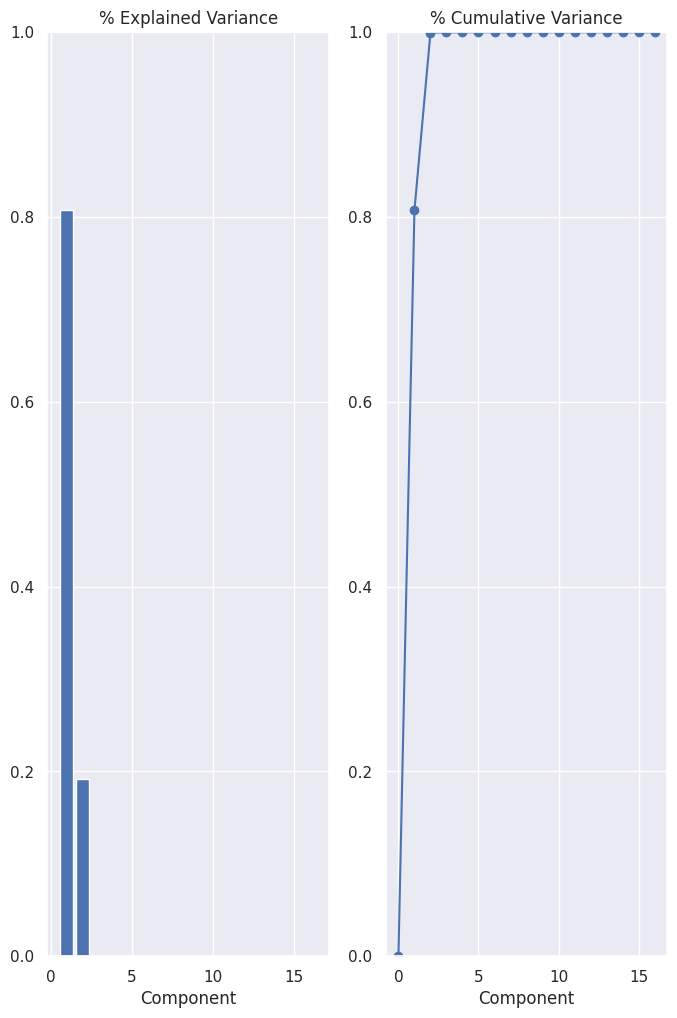

In [29]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
    
plot_variance(pca);

## I. **Modeling with XGBoost and Hyperparameter tuning with Optuna.**

In [30]:
"""
Scaling the columns looks it has a great impact on predicting our targets.
"""

'\nScaling the columns looks it has a great impact on predicting our targets.\n'

In [31]:
to_transform

['age',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [32]:
scaler = MinMaxScaler(feature_range=(-3, +3))
X[to_transform] = scaler.fit_transform(X[to_transform])

In [33]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss

# Rainbow color effect.
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, X.shape[1]))

class XGBMultiOutputRegressor:
    def __init__(self, n_trials=20, random_state=42, eval_metric="rmse", objective="reg:squarederror", tree_method="exact", verbosity=0):
        """
        MultiOutputRegressor using XGBoost with Optuna hyperparameter tuning.

        Parameters:
        - n_trials: Number of Optuna trials for tuning.
        - random_state: Random seed for reproducibility.
        - eval_metric: Evaluation metric for XGBoost.
        - objective: XGBoost objective function.
        - tree_method: Algorithm for tree construction.
        - verbosity: Logging level (0 = silent).
        - n_jobs: -1
        """
        self.n_trials = n_trials
        self.random_state = random_state
        self.eval_metric = eval_metric
        self.objective = objective
        self.tree_method = tree_method
        self.verbosity = verbosity
        self.model = None
        self.best_params = None
        self.n_jobs = -1

    def _objective(self, trial, X_train, y_train, X_val, y_val):
        """Objective function for Optuna hyperparameter tuning."""
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1200),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
            'max_depth': trial.suggest_int('max_depth', 3, 14),
            'subsample': trial.suggest_float('subsample', 0.1, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0),
            'eval_metric': self.eval_metric,
            'objective': self.objective,
            'tree_method': self.tree_method,
            'verbosity': self.verbosity,
            'n_jobs':self.n_jobs,
        }

        model = MultiOutputRegressor(xgb.XGBRegressor(random_state=self.random_state, **params))
        model.fit(X_train, y_train)
        predictions = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, predictions, multioutput='raw_values'))
        return np.mean(rmse)

    def tune_hyperparameters(self, X_train, y_train, X_val, y_val):
        """Runs Optuna to find the best hyperparameters."""
        study = optuna.create_study(direction='minimize', )
        study.optimize(lambda trial: self._objective(trial, X_train, y_train, X_val, y_val), n_trials=self.n_trials)
        print("="*40, sep='\n')
        self.best_params = study.best_params
        print("Best Hyperparameters:", self.best_params)

    def train(self, X_train, y_train):
        """Trains the final model using the best parameters found by Optuna."""
        if self.best_params is None:
            raise ValueError("Hyperparameters not tuned. Run `tune_hyperparameters` first!")

        self.model = MultiOutputRegressor(
            xgb.XGBRegressor(random_state=self.random_state, **self.best_params)
        )

        print("Training model...")
        self.model.fit(X_train, y_train)
        print("Model trained successfully!")

    def evaluate(self, X_val, y_val):
        """Evaluates the trained model using RMSE."""
        if self.model is None:
            raise ValueError("Model is not trained yet. Run `train` first!")

        predictions = self.model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, predictions, multioutput='raw_values'))
        print(f"RMSE per output: {rmse}")
        print(f"Mean RMSE: {np.mean(rmse):.4f}")
        return np.mean(rmse)

    def plot_feature_importance(self, feature_names):
        """Plots feature importance using actual feature names."""
        if self.model is None:
            raise ValueError("Model is not trained yet. Run `train` first!")

        importance = self.model.estimators_[0].feature_importances_
        sorted_idx = np.argsort(importance)[::-1]
        sorted_features = [feature_names[i] for i in sorted_idx]
        sorted_importance = importance[sorted_idx]

        plt.figure(figsize=(10, 5))
        plt.barh(sorted_features, sorted_importance, color=category_colors)
        plt.xlabel("Importance Score")
        plt.ylabel("Feature Name")
        plt.title("Feature Importance (XGBoost)")
        plt.gca().invert_yaxis()
        plt.show()

[I 2025-03-03 14:34:06,209] A new study created in memory with name: no-name-351bd9bd-7498-4b72-b73d-93422c65a70f
[I 2025-03-03 14:34:21,915] Trial 0 finished with value: 2.463018745034417 and parameters: {'n_estimators': 448, 'learning_rate': 0.01531919825072013, 'max_depth': 12, 'subsample': 0.7975624577599985, 'colsample_bytree': 0.6312937025703557, 'reg_lambda': 8.532524944310802, 'reg_alpha': 3.104920910996228}. Best is trial 0 with value: 2.463018745034417.
[I 2025-03-03 14:34:27,711] Trial 1 finished with value: 6.863711568126023 and parameters: {'n_estimators': 889, 'learning_rate': 0.4324799536881318, 'max_depth': 11, 'subsample': 0.6904771525745125, 'colsample_bytree': 0.13345728465211204, 'reg_lambda': 3.4869177436042214, 'reg_alpha': 8.878968440379035}. Best is trial 0 with value: 2.463018745034417.
[I 2025-03-03 14:34:35,557] Trial 2 finished with value: 4.349805414712069 and parameters: {'n_estimators': 805, 'learning_rate': 0.23605014281008527, 'max_depth': 8, 'subsample

Best Hyperparameters: {'n_estimators': 686, 'learning_rate': 0.020807222486212525, 'max_depth': 9, 'subsample': 0.974896275773738, 'colsample_bytree': 0.9649378569877631, 'reg_lambda': 1.4795813312782924, 'reg_alpha': 2.494078954328818}
Training model...
Model trained successfully!
RMSE per output: [1.16927761 1.54721965]
Mean RMSE: 1.3582


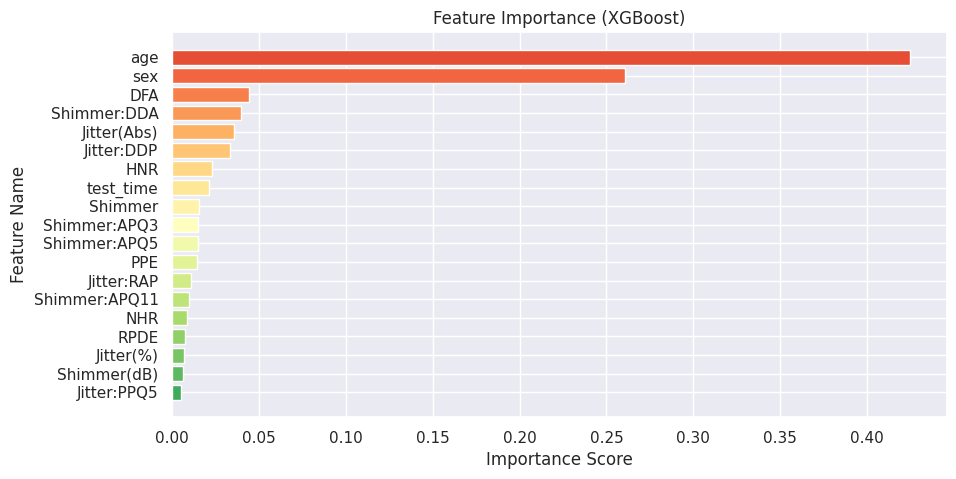

In [34]:
# Execute
if __name__ == "__main__":
    
    feature_names = list(X.columns)
 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

    # Instantiate and train model
    regressor = XGBMultiOutputRegressor(n_trials=200, eval_metric="rmse", objective="reg:squarederror", tree_method="exact", verbosity=0)
    regressor.tune_hyperparameters(X_train, y_train, X_val, y_val)
    regressor.train(X_train, y_train)
    regressor.evaluate(X_val, y_val)

    # Plot feature importance with feature names
    regressor.plot_feature_importance(feature_names)
    
# needs to be the lowest as possible